# Sentiment analysis

## Exercise: Sentiment distribution
### **Brief Description of LabMT 1.0 Wordlist Generation**
The LabMT 1.0 wordlist was created to measure the emotional impact of 10,222 common words using ratings from Mechanical Turk workers. Each word received an average "happiness" score based on 50 user evaluations. Additionally, the list ranks how often each word appears in four text sources: Twitter, Google Books, New York Times, and Music Lyrics. Words not in the top 5,000 for a source are marked with "–." This dataset helps researchers understand the emotional tone of language across different media.

### **Function to Calculate Sentiment Using the LabMT Word List**

In [17]:
import pandas as pd

# Define the file path, assuming it's in the same directory as the notebook
file_path = "Data_Set_S1.txt"
# Load the file, skipping the introductory lines
labmt_data = pd.read_csv(file_path, delimiter='\t', skiprows=2)
print(labmt_data.head())


        word  happiness_rank  happiness_average  happiness_standard_deviation  \
0   laughter               1               8.50                        0.9313   
1  happiness               2               8.44                        0.9723   
2       love               3               8.42                        1.1082   
3      happy               4               8.30                        0.9949   
4    laughed               5               8.26                        1.1572   

  twitter_rank google_rank nyt_rank lyrics_rank  
0         3600          --       --        1728  
1         1853        2458       --        1230  
2           25         317      328          23  
3           65        1372     1313         375  
4         3334        3542       --        2332  


In [19]:
happiness_dict = labmt_data.set_index('word')['happiness_average'].to_dict()
def calculate_sentiment(tokens):
    """
    Calculate the average happiness score for a given list of tokens based on the LabMT word list.
    
    Parameters:
    tokens (list): List of words (tokens) for which sentiment will be calculated.
    
    Returns:
    float: The average happiness score of the tokens, or None if no words match.
    """
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Collect happiness scores for tokens that exist in happiness_dict
    scores = [happiness_dict[token] for token in tokens if token in happiness_dict]
    
    # Calculate and return the average happiness score if there are matching words
    if scores:
        return sum(scores) / len(scores)
    else:
        return None  # Return None if no tokens matched


tokens = ["happy", "love", "sad", "laughter", "unknownword"]
sentiment_score = calculate_sentiment(tokens)
print("Sentiment score:", sentiment_score)

Sentiment score: 6.8999999999999995


In [25]:
import os
import pickle

# Assuming you are running this from within the Alec-jawa project folder (e.g., week 8 or any subfolder),
# we go directly from the project root.
base_project_path = os.path.join(os.getcwd().split("Alec-jawa")[0], "Alec-jawa")

# Define the relative path to the pickle file from the base project path
file_path = os.path.join(base_project_path, "week5", "shared", "performer_network.pkl")


# Load the graph from the specified file path
if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
else:
    print(f"File not found: {file_path}")

Number of nodes: 1939
Number of edges: 17578


In [33]:

import wikipediaapi
# Initialize Wikipedia API with a descriptive user-agent
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent="ArtistSentimentAnalysisBot/1.0 (https://example.com; email@example.com)"
)


In [35]:
import networkx as nx


# Function to get summary text from Wikipedia
def get_wikipedia_summary(title):
    page = wiki_wiki.page(title)
    if page.exists():
        return page.summary  # Return the summary of the page
    else:
        print(f"Wikipedia page not found for '{title}'")
        return ""

# Assuming G is your graph and node names are artist names
for node in G.nodes:
    # Get the Wikipedia summary for the artist (node name)
    artist_name = node  # Assuming node names are the artist names
    summary_text = get_wikipedia_summary(artist_name)
    
    # Assign the fetched summary as the 'page' attribute for sentiment analysis
    G.nodes[node]["page"] = summary_text

# Optional: Print a few nodes to verify
for node in list(G.nodes)[:5]:  # Just print the first 5 nodes as a sample
    print(f"Node {node} - Wikipedia Summary: {G.nodes[node]['page'][:300]}...")  # Print first 300 characters


Node Bryan Austin - Wikipedia Summary: Bryan Cuevas (born September 12, 1967) is an American country music artist, known professionally as Bryan Austin. Signed to Liberty Records' sister label Patriot Records in 1994, he released an album and two singles for the label. The first of these singles, "Radio Active", charted on the Billboard ...
Node Gene Autry - Wikipedia Summary: Orvon Grover "Gene" Autry (September 29, 1907 – October 2, 1998), nicknamed the Singing Cowboy, was an American actor, musician, singer, composer, rodeo performer, and baseball team owner, who largely gained fame by singing in a crooning style on radio, in films, and on television for more than thre...
Node Reba McEntire - Wikipedia Summary: Reba Nell McEntire ( REE-bə-MACK-in-tyre; born March 28, 1955), or simply Reba, is an American country singer and actress. Dubbed "the Queen of Country", she has sold more than 75 million records worldwide. Since the 1970s she has placed over 100 singles on the Billboard Hot 

### Tokenizing and Calculating Sentiment for Each Node's Wikipedia Summary

In [36]:
import re

# Function to tokenize the text for sentiment analysis
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Calculate sentiment for each node based on its Wikipedia summary
for node in G.nodes:
    # Get the Wikipedia summary already stored in the 'page' attribute
    page_text = G.nodes[node].get("page", "")
    
    # Tokenize the summary text
    tokens = tokenize(page_text)
    
    # Calculate the sentiment score
    sentiment_score = calculate_sentiment(tokens)
    
    # Add the sentiment score as a new attribute for the node
    G.nodes[node]["sentiment"] = sentiment_score

# Optional: Print sentiment score for each node to verify
for node in G.nodes:
    print(f"Node {node} - Sentiment Score: {G.nodes[node]['sentiment']}")

Node Bryan Austin - Sentiment Score: 5.77063829787234
Node Gene Autry - Sentiment Score: 5.7146613545816765
Node Reba McEntire - Sentiment Score: 5.643050458715592
Node Lee Brice - Sentiment Score: 5.689641025641028
Node Leland Martin - Sentiment Score: 5.754716981132076
Node Lorenzo Antonio - Sentiment Score: 5.794193548387096
Node The Peasall Sisters - Sentiment Score: 5.707857142857143
Node Ray Benson - Sentiment Score: 5.695652173913044
Node Pokey LaFarge - Sentiment Score: 6.015555555555554
Node Johnny Gimble - Sentiment Score: 5.54290909090909
Node John Prine - Sentiment Score: 5.593107142857143
Node Sean Hogan - Sentiment Score: 6.114285714285715
Node Valerie June - Sentiment Score: 5.86875
Node Aubrey Haynie - Sentiment Score: 5.660425531914894
Node Thomas Rhett - Sentiment Score: 5.699345238095242
Node Railroad Earth - Sentiment Score: 5.685479452054798
Node Nikki Hornsby - Sentiment Score: 5.750470588235295
Node Ricky Nelson - Sentiment Score: 5.557744360902254
Node Darryl Wo

### Summary Statistics of Sentiment Scores Across All Nodes

In [37]:
import numpy as np

# Extract all sentiment scores from nodes
sentiment_scores = [G.nodes[node]["sentiment"] for node in G.nodes if G.nodes[node]["sentiment"] is not None]

# Calculate statistics
average_sentiment = np.mean(sentiment_scores)
median_sentiment = np.median(sentiment_scores)
variance_sentiment = np.var(sentiment_scores)
percentile_25 = np.percentile(sentiment_scores, 25)
percentile_75 = np.percentile(sentiment_scores, 75)

# Print results
print("Average Sentiment:", average_sentiment)
print("Median Sentiment:", median_sentiment)
print("Variance of Sentiment:", variance_sentiment)
print("25th Percentile of Sentiment:", percentile_25)
print("75th Percentile of Sentiment:", percentile_75)


Average Sentiment: 5.6835875997205845
Median Sentiment: 5.666044176706821
Variance of Sentiment: 0.01985045778293038
25th Percentile of Sentiment: 5.593420072618937
75th Percentile of Sentiment: 5.754916916541731


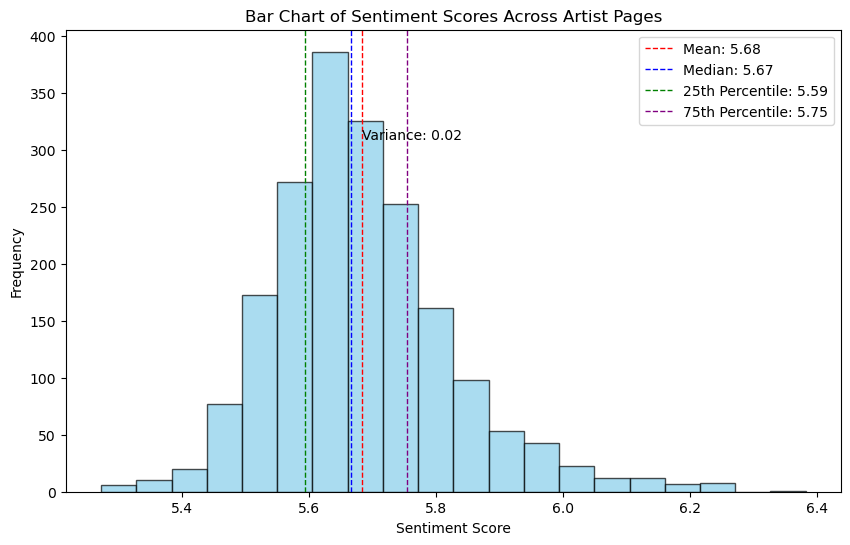

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming sentiment_scores is a list of sentiment values from nodes
sentiment_scores = [G.nodes[node]["sentiment"] for node in G.nodes if G.nodes[node]["sentiment"] is not None]

# Calculate the necessary statistics
average_sentiment = np.mean(sentiment_scores)
median_sentiment = np.median(sentiment_scores)
variance_sentiment = np.var(sentiment_scores)
percentile_25 = np.percentile(sentiment_scores, 25)
percentile_75 = np.percentile(sentiment_scores, 75)

# Define bins for bar chart
num_bins = 20  # Adjust as needed for desired granularity
counts, bin_edges = np.histogram(sentiment_scores, bins=num_bins)

# Calculate bin centers for plotting
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color="skyblue", edgecolor="black", alpha=0.7)

# Add vertical lines for mean, median, and percentiles
plt.axvline(average_sentiment, color="red", linestyle="dashed", linewidth=1, label=f'Mean: {average_sentiment:.2f}')
plt.axvline(median_sentiment, color="blue", linestyle="dashed", linewidth=1, label=f'Median: {median_sentiment:.2f}')
plt.axvline(percentile_25, color="green", linestyle="dashed", linewidth=1, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color="purple", linestyle="dashed", linewidth=1, label=f'75th Percentile: {percentile_75:.2f}')

# Annotate the variance on the plot
plt.text(x=average_sentiment, y=max(counts) * 0.8, s=f'Variance: {variance_sentiment:.2f}', color="black")

# Customize the plot
plt.title("Bar Chart of Sentiment Scores Across Artist Pages")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()


In [40]:
# Extract nodes with their sentiment scores
artist_sentiments = [(node, G.nodes[node]["sentiment"]) for node in G.nodes if G.nodes[node]["sentiment"] is not None]

# Sort nodes by sentiment score in ascending order
artist_sentiments_sorted = sorted(artist_sentiments, key=lambda x: x[1])

# Get the 10 artists with the saddest pages (lowest sentiment scores)
saddest_artists = artist_sentiments_sorted[:10]

# Get the 10 artists with the happiest pages (highest sentiment scores)
happiest_artists = artist_sentiments_sorted[-10:]

# Display the results
print("10 Artists with the Saddest Pages:")
for artist, sentiment in saddest_artists:
    print(f"Artist: {artist}, Sentiment Score: {sentiment:.2f}")

print("\n10 Artists with the Happiest Pages:")
for artist, sentiment in happiest_artists:
    print(f"Artist: {artist}, Sentiment Score: {sentiment:.2f}")


10 Artists with the Saddest Pages:
Artist: The Stanley Brothers, Sentiment Score: 5.27
Artist: Tex Williams, Sentiment Score: 5.28
Artist: Randy Howard (fiddler), Sentiment Score: 5.30
Artist: Merle Kilgore, Sentiment Score: 5.30
Artist: Gary Stewart (singer), Sentiment Score: 5.31
Artist: The Jenkins, Sentiment Score: 5.33
Artist: Cody Jinks, Sentiment Score: 5.34
Artist: John D. Loudermilk, Sentiment Score: 5.35
Artist: Brice Long, Sentiment Score: 5.35
Artist: Bill Haley & His Comets, Sentiment Score: 5.36

10 Artists with the Happiest Pages:
Artist: Hailey Whitters, Sentiment Score: 6.21
Artist: Jim Witter, Sentiment Score: 6.22
Artist: Mandy Barnett, Sentiment Score: 6.22
Artist: Del McCoury Band, Sentiment Score: 6.22
Artist: The Rankin Family, Sentiment Score: 6.25
Artist: Royal Wade Kimes, Sentiment Score: 6.26
Artist: Melodie Crittenden, Sentiment Score: 6.26
Artist: Kyle Park, Sentiment Score: 6.26
Artist: Dianna Corcoran, Sentiment Score: 6.27
Artist: Con Hunley, Sentiment S

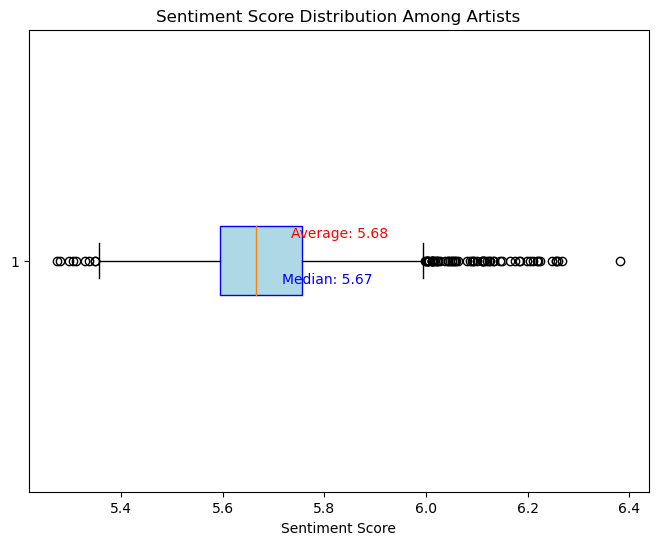

In [44]:
import numpy as np

# Sample sentiment scores list (replace this with your actual sentiment scores if needed)
sentiment_scores = [G.nodes[node]["sentiment"] for node in G.nodes if G.nodes[node]["sentiment"] is not None]

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot(sentiment_scores, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"))
plt.xlabel("Sentiment Score")
plt.title("Sentiment Score Distribution Among Artists")
plt.annotate(f"Average: {np.mean(sentiment_scores):.2f}", xy=(np.mean(sentiment_scores), 1), xytext=(np.mean(sentiment_scores) + 0.05, 1.05), color="red")
plt.annotate(f"Median: {np.median(sentiment_scores):.2f}", xy=(np.median(sentiment_scores), 1), xytext=(np.median(sentiment_scores) + 0.05, 0.95), color="blue")
plt.show()


In [50]:
# Filter nodes to get only artists with a genre
artists_with_genre = [node for node in G.nodes if "genre" in G.nodes[node] and G.nodes[node]["sentiment"] is not None]

# Extract sentiment scores for this sub-network
genre_sentiment_scores = [G.nodes[node]["sentiment"] for node in artists_with_genre]


[]
